# Teil 6 Demo 1: Visualisierung mit Diagrammen

## Bibliotheken & Konfiguration

In [1]:
packages <- c("readr", "dplyr", "tidyr", "ggplot2")
install.packages(setdiff(packages, rownames(installed.packages())))
lapply(packages, require, character.only = TRUE)

Loading required package: readr

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: ggplot2



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

## Mannheimer Bevölkerungsdaten aus dem Open Data-Portal laden und in "long"-Format pivotieren

In [2]:
mannheim.population.raw <- read_delim("https://mannheim.opendatasoft.com/explore/dataset/bevolkerungsbestand-in-mannheim-2009-2021/download/?format=csv&timezone=Europe/Berlin&lang=de&use_labels_for_header=true&csv_separator=%3B",
                                      col_names =    c("id", "jahr", "stadtteil_id", "stadtteil_name", "n_gesamt", "n_weiblich", "n_ohne_migration", "n_mit_migration", "n_auslaender"),
                                      col_types = cols("i",  "i",    "c",            "c",              "i",        "i",          "i",                "i",               "i"),
                                      skip = 1, delim=";")
mannheim.population.long <- mannheim.population.raw %>% pivot_longer(!c(id, jahr, stadtteil_id, stadtteil_name), names_to="variable", values_to="n")
head(mannheim.population.long)

id,jahr,stadtteil_id,stadtteil_name,variable,n
<int>,<int>,<chr>,<chr>,<chr>,<int>
2,2021,012,Jungbusch,n_gesamt,6447
2,2021,012,Jungbusch,n_weiblich,2730
2,2021,012,Jungbusch,n_ohne_migration,2119
2,2021,012,Jungbusch,n_mit_migration,4328
2,2021,012,Jungbusch,n_auslaender,3350
3,2021,020,Neckarstadt-West,n_gesamt,20311


## Einfaches Barchart der Gesamtbevölkerung vs. Zeit

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

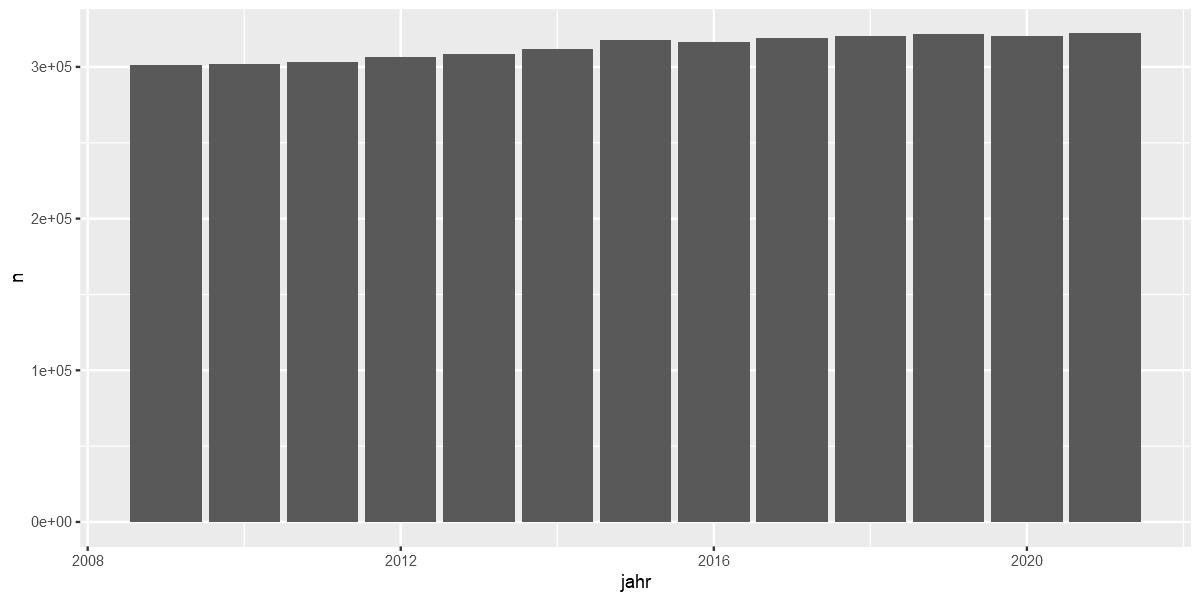

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5) # die Option gibt Größe/Seitenverhältnis des Outputs in Jupyter an
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt"),
       aes(x=jahr, y=n)) +
    geom_bar(stat = "identity") # Option stat="identity" ist nötig, da geom_bar sonst defaultmäßig die Zahl der Datensätze zählen würde

## Erweiterung um Differenzierung nach Stadtteil (stacked Barchart)

Hierzu nur Aufnahme von *fill=stadteil_name* in aes() nötig:

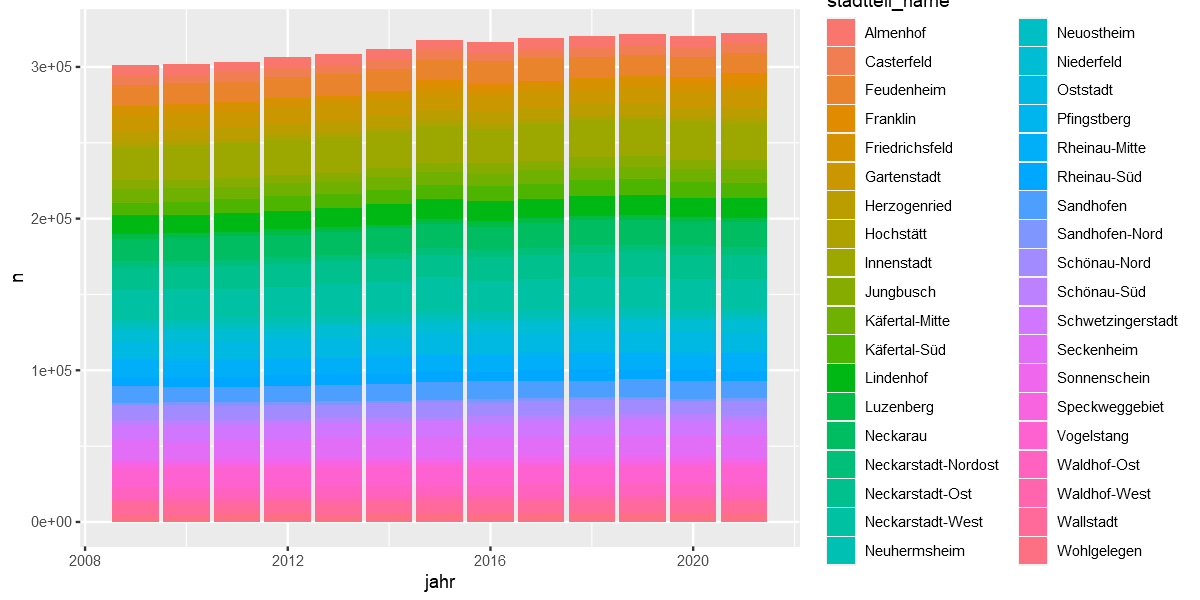

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt"),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity")

## Darstellung als grouped Barchart

Der Übersichtlichkeit halber auf 3 Stadtteile gefiltert

Hierzu nur Ergänzung von *position="dodge"* im geom_bar() nötig:

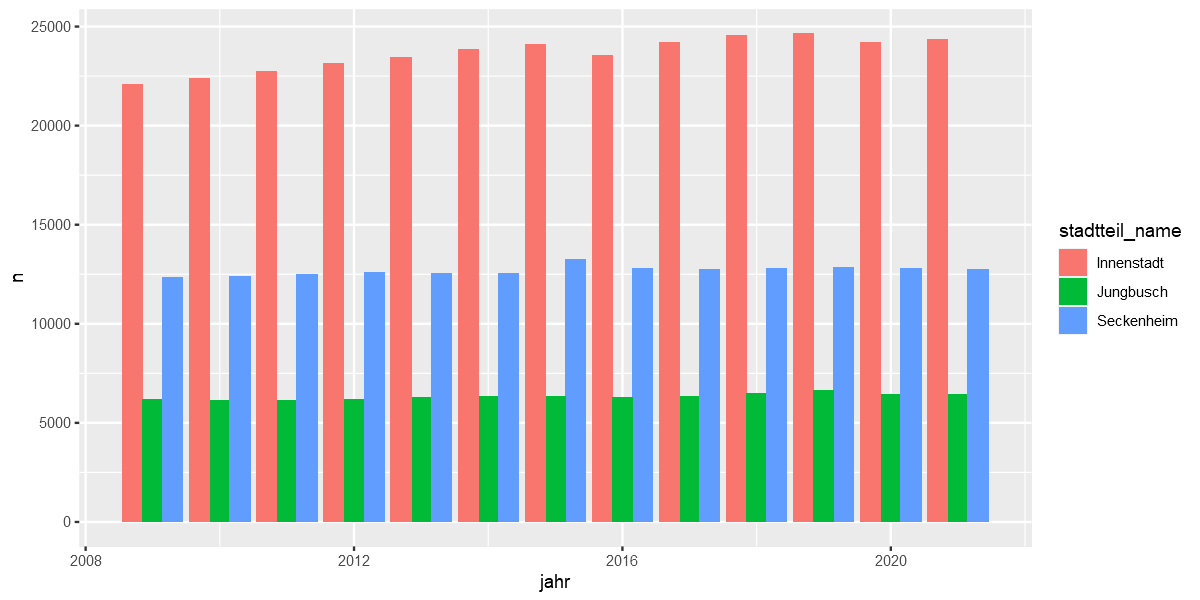

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt", stadtteil_name %in% c("Innenstadt", "Jungbusch", "Seckenheim")),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity", position="dodge")

## Darstellung als Barchart mit prozentualem Anteil

Der Übersichtlichkeit halber auf 3 Stadtteile gefiltert

Hierzu nur Änderung auf *position="fill"* im geom_bar() nötig:

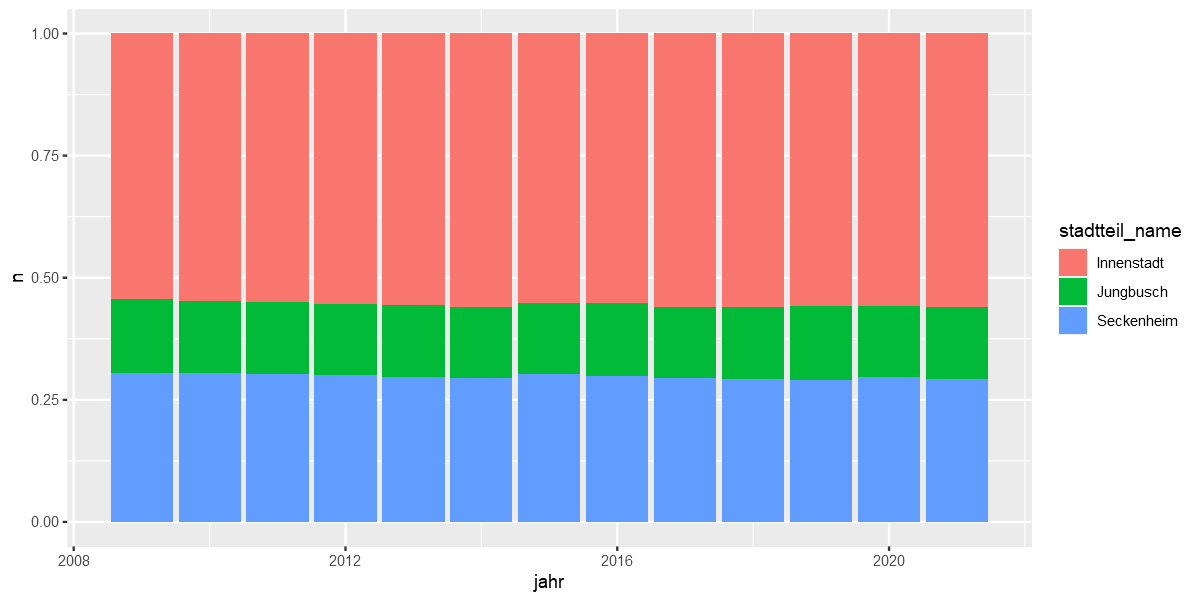

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt", stadtteil_name %in% c("Innenstadt", "Jungbusch", "Seckenheim")),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity", position="fill")

## Darstellung Bevölkerung nach Stadtteil in 2020 als Piechart

Der Übersichtlichkeit halber auf 3 Stadtteile gefiltert

ggplot sieht kein eigenes geom für Kuchendiagramme vor, stattdessen wird ein Barchart auf ein Polar-Koordinatensystem abgebildet:

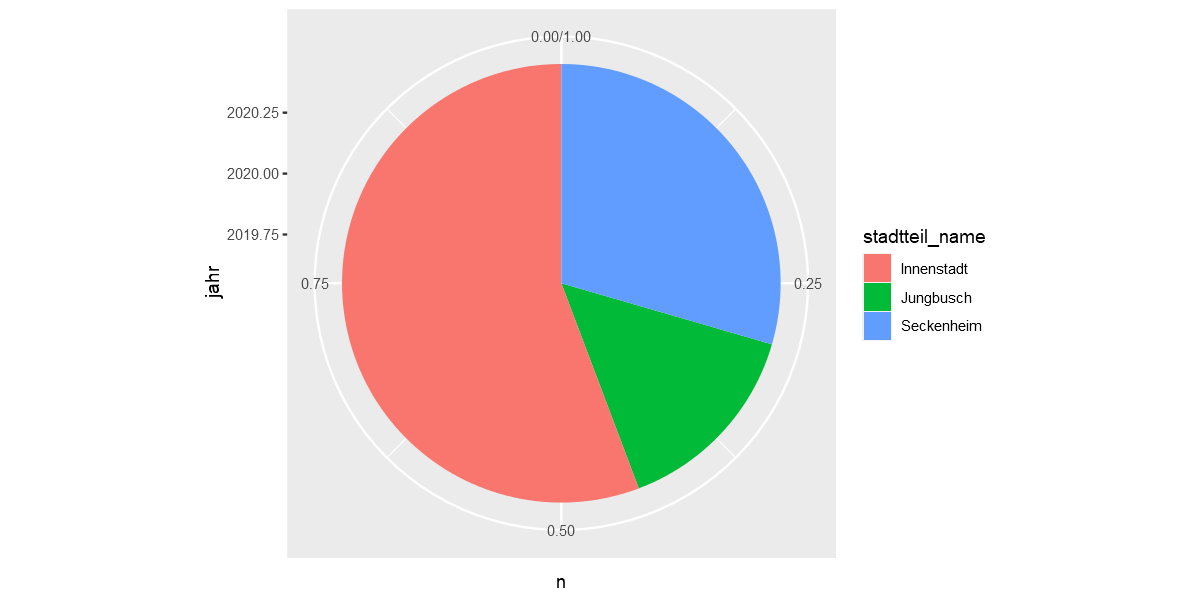

In [7]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt", jahr == 2020, stadtteil_name %in% c("Innenstadt", "Jungbusch", "Seckenheim")),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity", position="fill") +
    coord_polar("y", start=0)

# Aufteilung auf mehrere Subplots nach Stadtteil

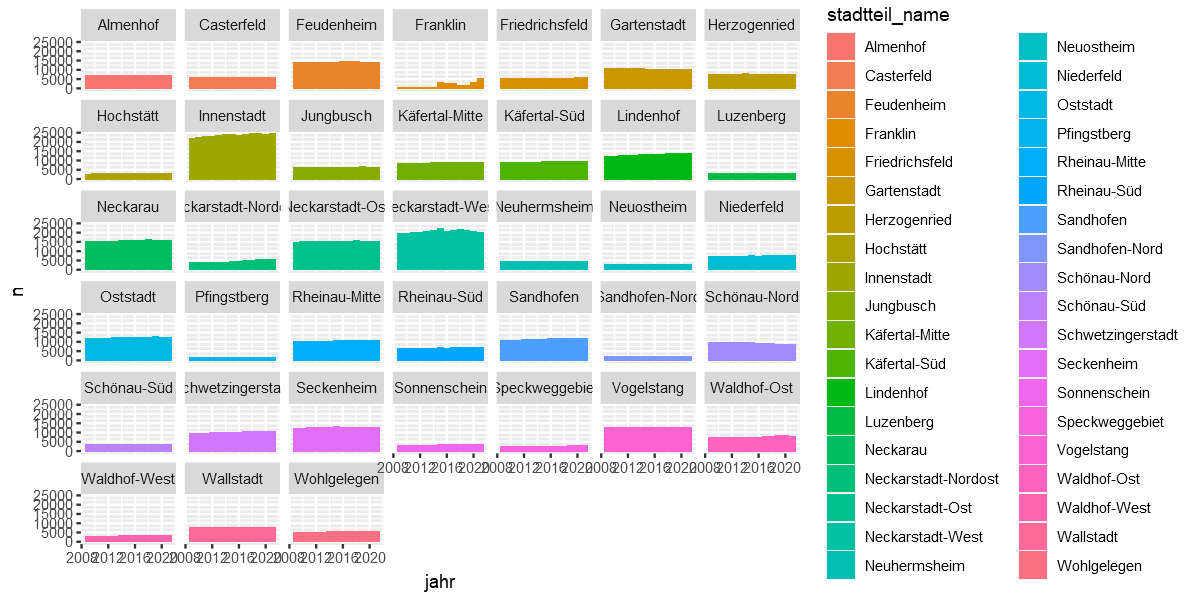

In [8]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt"),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity") +
    facet_wrap(~stadtteil_name)

# Gesamtmittelwert Bevölkerung (alle Jahre/alle Stadtteile) hinzufügen

Hierzu wird ein zusätzliches geom ergänzt (geom_hline), dessen Wert "on-the-fly" aus den Daten des Gesamtplots berechnet wird:

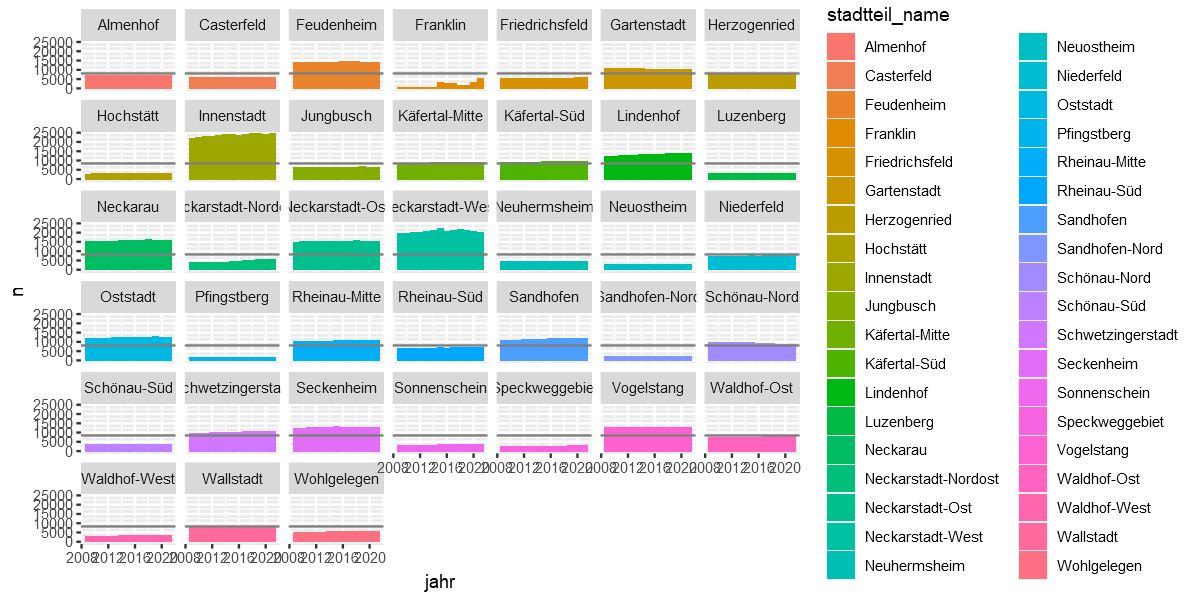

In [9]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt"),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity") +
    geom_hline(aes(yintercept=mean(n)), colour="grey50") +
    facet_wrap(~stadtteil_name)

## Bevölkerung mit Migrationshintergrund als zweite Kennzahl hinzufügen

Hierzu wird ein weiteres geom (geom_point) ergänzt, das eine separate Datenquelle hat (gleicher Grunddatensatz und X-Achse, aber auf eine andere Kennzahl gefiltert):

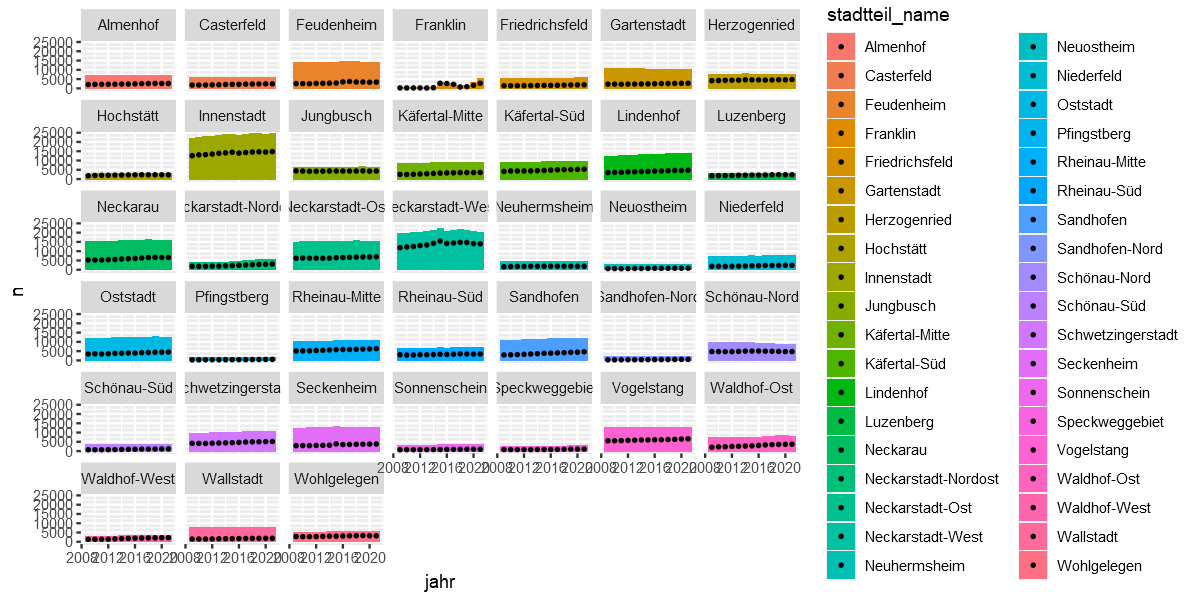

In [10]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt"),
       aes(x = jahr, y = n, fill = stadtteil_name)) +
    geom_bar(stat = "identity") +
    geom_point(data = mannheim.population.long %>% filter(variable == "n_mit_migration"),
               aes(x = jahr, y = n), size = 0.5) +
    facet_wrap(~stadtteil_name)

## Formatierung anpassen

* Beschriftung X-Achse kleiner und hochkant
* Beschriftung Y-Achse noch kleiner
* Beschriftung der Einzelplot-Titel kleiner
* Ausblenden der Legende, da redundant mit den Einzelplot-Titeln

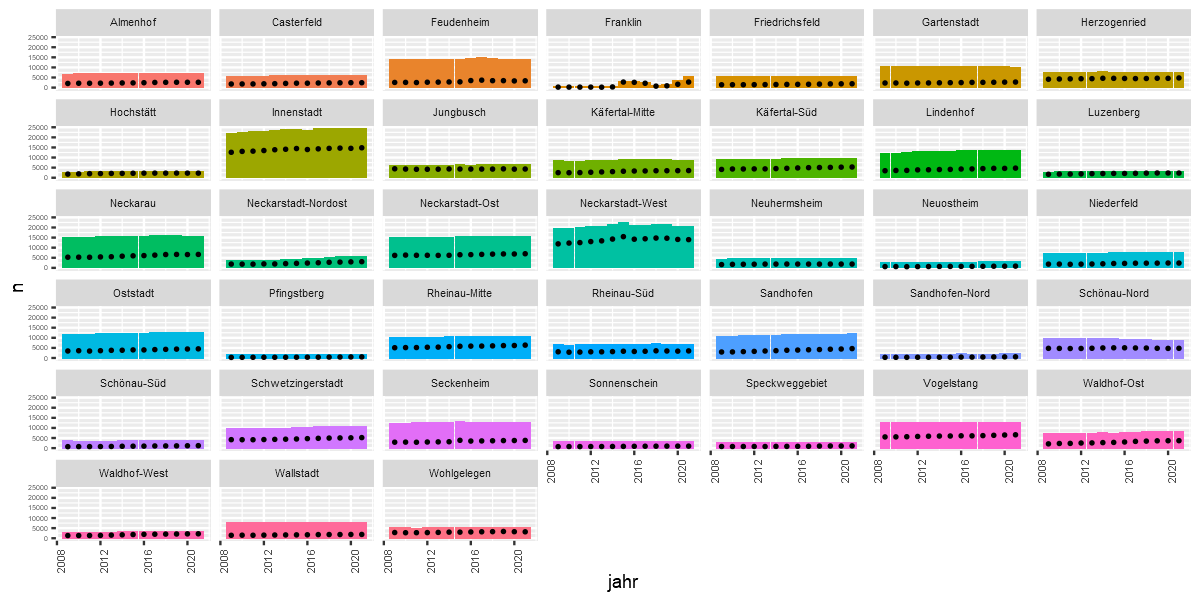

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.population.long %>% filter(variable == "n_gesamt"),
       aes(x=jahr, y=n, fill=stadtteil_name)) +
    geom_bar(stat = "identity") +
    geom_point(data = mannheim.population.long %>% filter(variable == "n_mit_migration"),
               aes(x = jahr, y = n), size = 0.5) +
    facet_wrap(~stadtteil_name) +
    theme(axis.text.x = element_text(size=6, angle = 90),
          axis.text.y = element_text(size=4),
          strip.text.x.top = element_text(size = 6)
         ) +
    guides(fill = "none")